# importing libraries

In [88]:
import pandas as pp
import matplotlib.pyplot as mm
%matplotlib inline 
from sklearn import linear_model
import seaborn as ss

# loading the data

In [78]:
a = pp.read_csv("salaries.csv")
a

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


# Univariate Analysis


In [83]:
#Now Let's look at the distribution of some columns  
#As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot.

<Axes: xlabel='degree'>

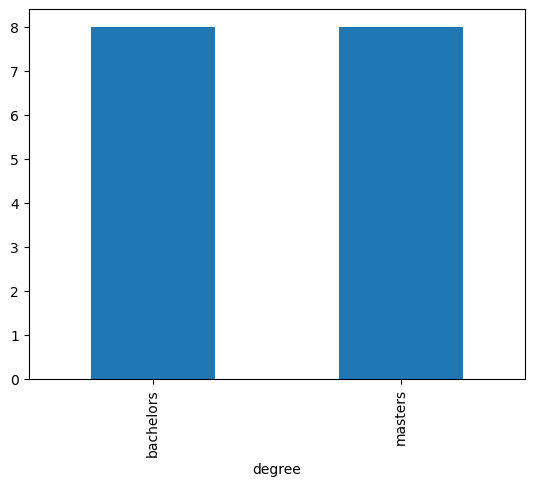

In [90]:
a['degree'].value_counts().plot.bar()

<Axes: ylabel='count'>

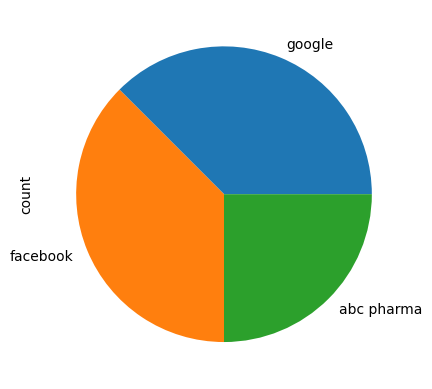

In [86]:
a['company'].value_counts().plot.pie()

<Axes: xlabel='job'>

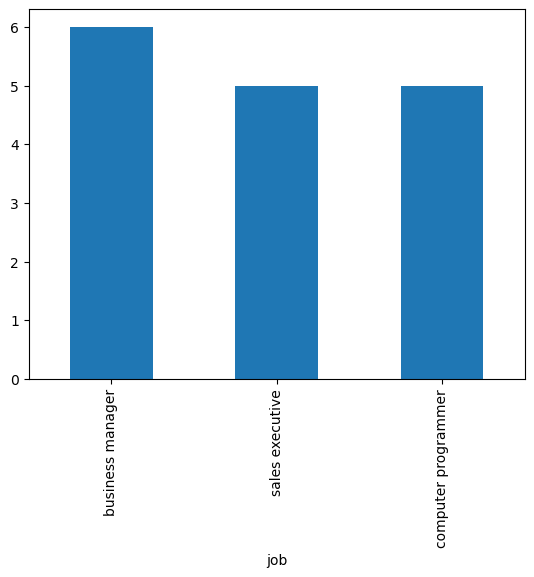

In [87]:
a['job'].value_counts().plot.bar()

# drop the column with the string value : salary_more_then_100k

In [60]:
b = a.drop('salary_more_then_100k',axis = 'columns')
b

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [61]:
c = a['salary_more_then_100k']
c

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

# import the LabelEncoder

In [62]:
from sklearn.preprocessing import LabelEncoder 

In [63]:
# now we need to change the company , job , degree from string to the integer value for the linear regression
# lets do it by labelencoder

In [64]:
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [65]:
b['new_company'] = le_company.fit_transform(b['company'])
b['new_job'] = le_job.fit_transform(b['job'])
b['new_degree'] = le_degree.fit_transform(b['degree'])
b.head(20)

,company,job,degree,new_company,new_job,new_degree
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [66]:
e = b.drop(['company','job','degree'],axis = 'columns')
e

,new_company,new_job,new_degree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


# importing the decision tree 

In [67]:
from sklearn import tree

In [68]:
#training the model
model = tree.DecisionTreeClassifier()

In [69]:
model.fit(e,c)

DecisionTreeClassifier()

# check the score of model

In [70]:
model.score(e,c)

1.0

In [71]:
#company
# abc farma = 0
# facebook = 1
# google = 2


#job
#business manager = 0 , sales executive = 1, computer programmer = 2


#degree
#bachelor = 0,master = 1 

# model.predict([[company , job , degree]])

# predicting the salary more than 100k

In [72]:
model.predict([[2,2,0]])

/Users/devanshgupta/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [73]:
model.predict([[2,2,1]])

/Users/devanshgupta/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [74]:
model.predict([[2,1,0]])

/Users/devanshgupta/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [77]:
model.predict([[1,2,1]])

/Users/devanshgupta/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
# array([1]) means yes 
# array([0]) means no 

# final conclusion

In [ ]:
#people working in the facebook have salary more than 100k that is 6
#people with the masters degree have more salary
#people with the job as business manager have more salary 